#**Exponential smoothing**



##  install these libraries using pip:



In [1]:
# !pip install pandas matplotlib

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

## Loading dataset

In [36]:
df = pd.read_csv('D:\\Tuwaiq Academy\\Tuwaiq_Academy_T5_Week_5\\Week5LAB4\\Datasets\\traffic.csv')
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [37]:
df.set_index('DateTime', inplace=True)
df

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041
...,...,...,...
2017-06-30 19:00:00,4,11,20170630194
2017-06-30 20:00:00,4,30,20170630204
2017-06-30 21:00:00,4,16,20170630214


In [39]:
df['hour'] = df.dt.hour
df

AttributeError: 'DataFrame' object has no attribute 'dt'

In [32]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.dtypes

DateTime    datetime64[ns]
Junction             int64
Vehicles             int64
ID                   int64
dtype: object

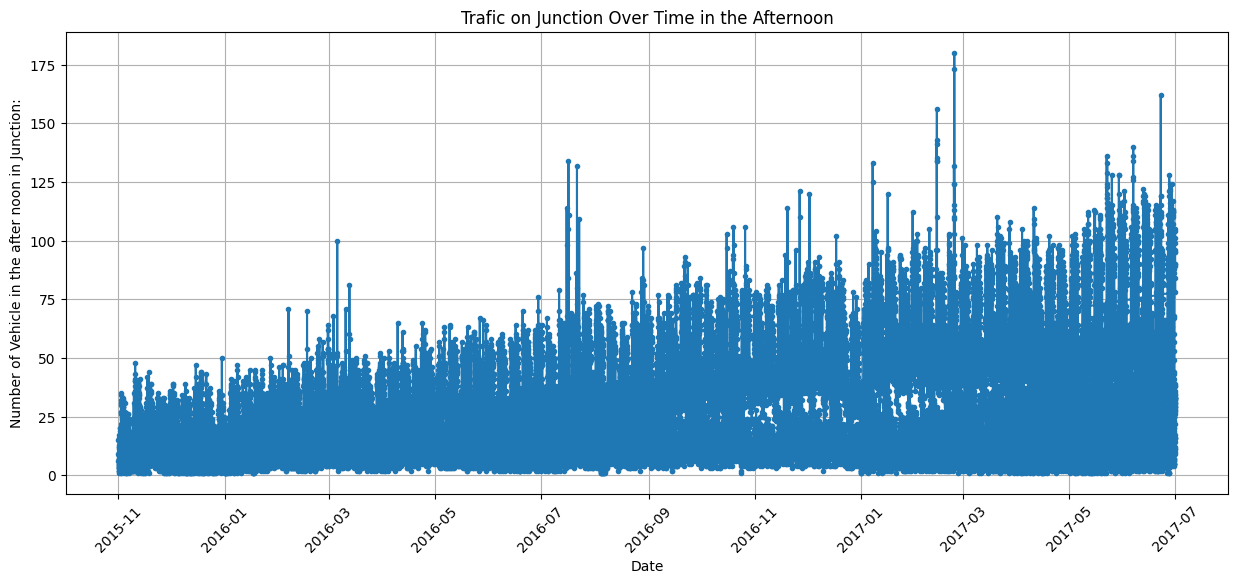

In [35]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

plt.figure(figsize=(15,6))
plt.plot(df['DateTime'], df['Vehicles'], marker='.')
plt.title('Trafic on Junction Over Time in the Afternoon')
plt.xlabel('Date')
plt.ylabel('Number of Vehicle in the after noon in Junction:')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [5]:
df.drop('ID', axis=1, inplace=True)
df

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
48115,2017-06-30 19:00:00,4,11
48116,2017-06-30 20:00:00,4,30
48117,2017-06-30 21:00:00,4,16
48118,2017-06-30 22:00:00,4,22


In [6]:
df['Hour'] = df['DateTime'].dt.hour
df['Date'] = df['DateTime'].dt.date
df

,DateTime,Junction,Vehicles,Hour,Date
0,2015-11-01 00:00:00,1,15,0,2015-11-01
1,2015-11-01 01:00:00,1,13,1,2015-11-01
2,2015-11-01 02:00:00,1,10,2,2015-11-01
3,2015-11-01 03:00:00,1,7,3,2015-11-01
4,2015-11-01 04:00:00,1,9,4,2015-11-01
...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,19,2017-06-30
48116,2017-06-30 20:00:00,4,30,20,2017-06-30
48117,2017-06-30 21:00:00,4,16,21,2017-06-30
48118,2017-06-30 22:00:00,4,22,22,2017-06-30


In [7]:
df.drop('DateTime', axis=1, inplace=True)

In [8]:
def count_Veh(df):
    # Initialize columns to store the sum for each period
    df['EM'] = 0
    df['M'] = 0
    df['AN'] = 0
    df['N'] = 0
    
    # Apply conditions to assign sums based on the hour
    df.loc[(df['Hour'] >= 0) & (df['Hour'] < 6), 'EM'] = df['Vehicles']
    df.loc[(df['Hour'] >= 6) & (df['Hour'] < 12), 'M'] = df['Vehicles']
    df.loc[(df['Hour'] >= 12) & (df['Hour'] < 18), 'AN'] = df['Vehicles']
    df.loc[(df['Hour'] >= 18) & (df['Hour'] < 24), 'N'] = df['Vehicles']

In [9]:
count_Veh(df)
df

,Junction,Vehicles,Hour,Date,EM,M,AN,N
0,1,15,0,2015-11-01,15,0,0,0
1,1,13,1,2015-11-01,13,0,0,0
2,1,10,2,2015-11-01,10,0,0,0
3,1,7,3,2015-11-01,7,0,0,0
4,1,9,4,2015-11-01,9,0,0,0
...,...,...,...,...,...,...,...,...
48115,4,11,19,2017-06-30,0,0,0,11
48116,4,30,20,2017-06-30,0,0,0,30
48117,4,16,21,2017-06-30,0,0,0,16
48118,4,22,22,2017-06-30,0,0,0,22


In [10]:
df.drop(['Hour', 'Vehicles'],axis=1, inplace=True)
df

,Junction,Date,EM,M,AN,N
0,1,2015-11-01,15,0,0,0
1,1,2015-11-01,13,0,0,0
2,1,2015-11-01,10,0,0,0
3,1,2015-11-01,7,0,0,0
4,1,2015-11-01,9,0,0,0
...,...,...,...,...,...,...
48115,4,2017-06-30,0,0,0,11
48116,4,2017-06-30,0,0,0,30
48117,4,2017-06-30,0,0,0,16
48118,4,2017-06-30,0,0,0,22


In [11]:
df = df.groupby(['Junction', 'Date']).sum().reset_index()
df

,Junction,Date,EM,M,AN,N
0,1,2015-11-01,60,72,87,108
1,1,2015-11-02,75,124,179,168
2,1,2015-11-03,93,134,168,149
3,1,2015-11-04,84,112,154,148
4,1,2015-11-05,92,102,137,133
...,...,...,...,...,...,...
2000,4,2017-06-26,27,39,60,55
2001,4,2017-06-27,25,35,101,64
2002,4,2017-06-28,33,51,86,106
2003,4,2017-06-29,49,62,106,79


In [12]:
def specific_data(junction, start, end):
    junction_data = df[df['Junction'] == junction]
    date_filtered_data = junction_data[(junction_data['Date'] > start) & (junction_data['Date'] < end)]
    return date_filtered_data

In [13]:
import random
import datetime as dt
junction_number = random.choice(df['Junction'].unique().tolist())

start_date=dt.date(2015,11,1)
end_date=dt.date(2017,6,30)


specific_df = specific_data(junction_number, start_date, end_date)

In [14]:
specific_df.head()

,Junction,Date,EM,M,AN,N
609,2,2015-11-02,34,41,52,70
610,2,2015-11-03,48,46,60,63
611,2,2015-11-04,43,42,57,57
612,2,2015-11-05,38,43,57,62
613,2,2015-11-06,41,47,57,54


## Visualizing the data





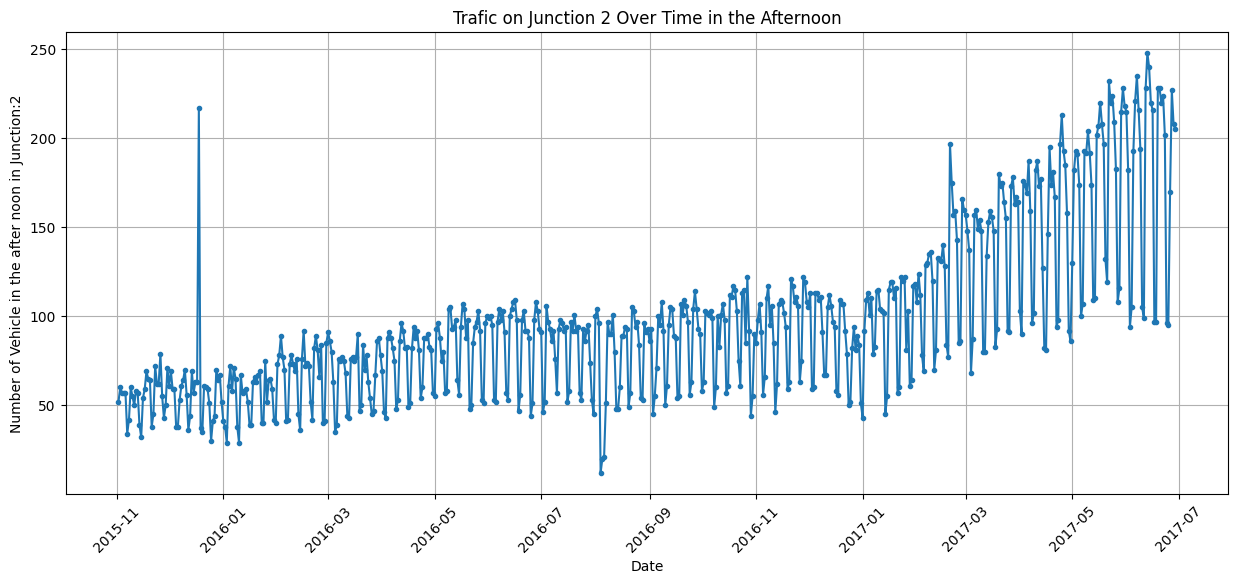

In [15]:
specific_df['Date'] = pd.to_datetime(specific_df['Date'])

plt.figure(figsize=(15,6))
plt.plot(specific_df['Date'], specific_df['AN'], marker='.')
plt.title(f'Trafic on Junction {junction_number} Over Time in the Afternoon')
plt.xlabel('Date')
plt.ylabel(f'Number of Vehicle in the after noon in Junction:{junction_number}')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
specific_df.drop(['Junction', 'N', 'EM', 'M'],axis=1,inplace=True)
specific_df

,Date,AN
609,2015-11-02,52
610,2015-11-03,60
611,2015-11-04,57
612,2015-11-05,57
613,2015-11-06,57
...,...,...
1210,2017-06-25,95
1211,2017-06-26,170
1212,2017-06-27,227
1213,2017-06-28,208


In [17]:
specific_df.set_index('Date', inplace=True)
specific_df

,AN
Date,
2015-11-02,52
2015-11-03,60
2015-11-04,57
2015-11-05,57
2015-11-06,57
...,...
2017-06-25,95
2017-06-26,170
2017-06-27,227


#**Single Exponential smoothing**





In [18]:
model = SimpleExpSmoothing(specific_df)
model_single_fit = model.fit()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Making predictions





In [19]:
forecast_single = model_single_fit.forecast(6)
print(forecast_single)

2017-06-30    183.921121
2017-07-01    183.921121
2017-07-02    183.921121
2017-07-03    183.921121
2017-07-04    183.921121
2017-07-05    183.921121
Freq: D, dtype: float64


## Visualize Single Exponential Smoothing




In [20]:
forecast_single = model_single_fit.forecast(40)

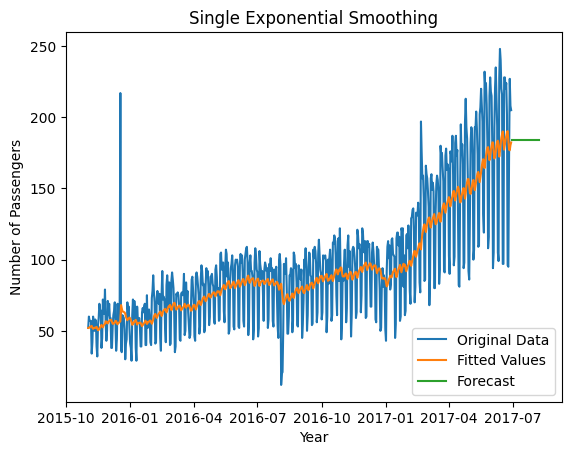

In [21]:
plt.plot(specific_df, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_single, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show()


#**Double Exponential Smoothing**




In [22]:
model = Holt(specific_df)
model_double_fit = model.fit()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Making predictions



In [23]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)

2017-06-30    184.110204
2017-07-01    184.019265
2017-07-02    183.928327
2017-07-03    183.837388
2017-07-04    183.746449
2017-07-05    183.655511
Freq: D, dtype: float64


## Visualize Double Exponential Smoothing




In [24]:
forecast_double = model_double_fit.forecast(40)

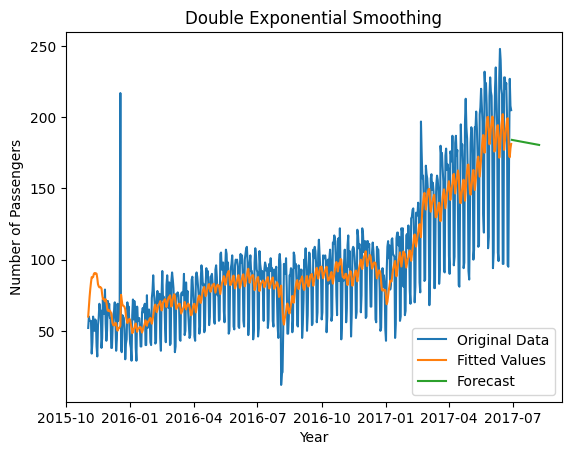

In [25]:
plt.plot(specific_df, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()


#**Holt-Winter’s Seasonal Smoothing**






In [26]:
model = ExponentialSmoothing(specific_df)
model_triple_fit = model.fit()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Making predictions



In [27]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)

2017-06-30    183.914684
2017-07-01    183.914684
2017-07-02    183.914684
2017-07-03    183.914684
2017-07-04    183.914684
2017-07-05    183.914684
Freq: D, dtype: float64


## Visualize Triple Exponential Smoothing




In [28]:
forecast_triple = model_triple_fit.forecast(40)

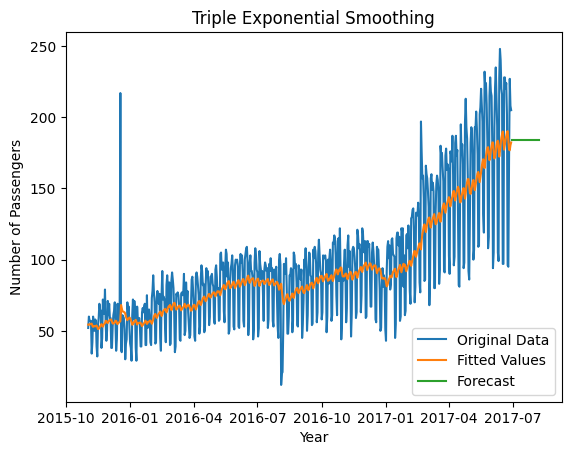

In [29]:
plt.plot(specific_df, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()


##**Well done :)**